In [2]:
import pandas as pd 
import numpy as np 
import re 
import nltk 
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sruth\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [4]:
data = ['1. The Quick Brown Fox jumps over the lazy dog!',
"2. NLP is amazing, isn't it? We're learning it at speed_of_light.",
'3. DATA SCIENCE involves 10% math and 90% persistence.','4. "To be, or not to be," that is the question.',
'5. Email us at support@example.com for help; #coding #2026']
labels = ['Grammer','technology','learing','Literature','support']
data = np.array(data)
data_df = pd.DataFrame({'Document':data, 'Category':labels})
data_df = data_df[['Document', 'Category']]
data_df

,Document,Category
0,1. The Quick Brown Fox jumps over the lazy dog!,Grammer
1,"2. NLP is amazing, isn't it? We're learning it...",technology
2,3. DATA SCIENCE involves 10% math and 90% pers...,learing
3,"4. ""To be, or not to be,"" that is the question.",Literature
4,5. Email us at support@example.com for help; #...,support


Sampled Data: ['Neutral' 'Neutral' 'Negative' 'Neutral' 'Neutral' 'Neutral' 'Positive'
 'Positive' 'Neutral' 'Neutral']


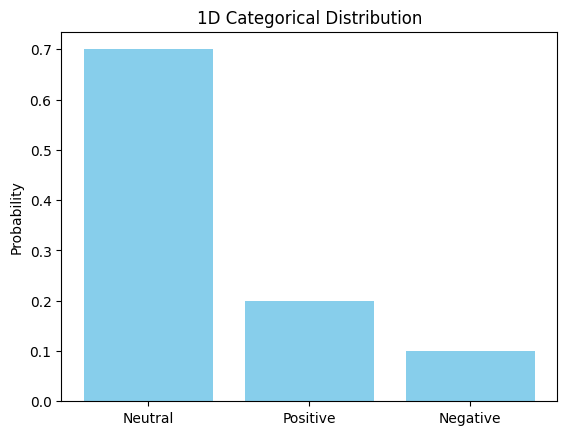

In [5]:
import matplotlib.pyplot as plt
categories = ['Neutral', 'Positive', 'Negative']
probabilities = [0.7, 0.2, 0.1]  # Must sum to 1

# Generate a sample
sample = np.random.choice(categories, size=10, p=probabilities)
print(f"Sampled Data: {sample}")

# Visualize
plt.bar(categories, probabilities, color='skyblue')
plt.title("1D Categorical Distribution")
plt.ylabel("Probability")
plt.show()

2D Probability Distribution Table:
         Neutral  Positive
Grammar      0.2      0.05
Tech         0.1      0.40
Math         0.2      0.05


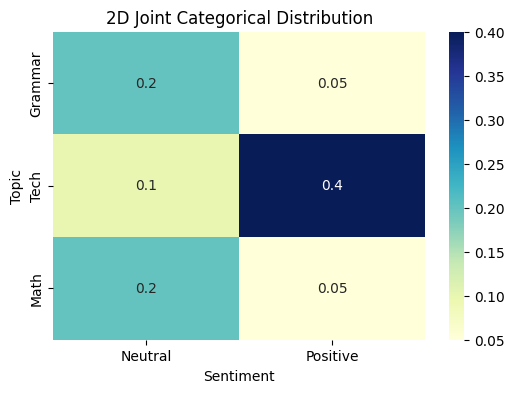

In [7]:
import seaborn as sns
topics = ['Grammar', 'Tech', 'Math']
sentiments = ['Neutral', 'Positive']

# Probability Matrix (Rows = Topics, Cols = Sentiments)
# Example: P(Tech, Positive) = 0.4
prob_matrix = np.array([
    [0.2, 0.05], # Grammar
    [0.1, 0.40], # Tech
    [0.2, 0.05]  # Math
])

# Convert to DataFrame for better visualization
df_dist = pd.DataFrame(prob_matrix, index=topics, columns=sentiments)

print("2D Probability Distribution Table:")
print(df_dist)

# Plotting the Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(df_dist, annot=True, cmap="YlGnBu")
plt.title("2D Joint Categorical Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Topic")
plt.show()

In [8]:
wpt = nltk.WordPunctTokenizer() 
stop_words = nltk.corpus.stopwords.words('english') 
def normalize_document(doc): 
 doc=re.sub(r'[^a-zA-Z0-9\s]','',doc,re.I) 
 doc=doc.lower() 
 doc=doc.strip() 
 tokens=wpt.tokenize(doc) 
 filtered_tokens=[token for token in tokens if token not in stop_words] 
 doc=' '.join(filtered_tokens) 
 return doc 

normalize_data=np.vectorize(normalize_document) 

In [9]:
norm_data = normalize_data(data)
norm_data

array(['1 quick brown fox jumps lazy dog',
       "2 nlp amazing ' ? ' learning speed_of_light .",
       '3 data science involves 10 math 90 % persistence .',
       '4 , ," question .',
       '5 email us supportexample . com help ; # coding # 2026'],
      dtype='<U54')

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(min_df=0., max_df=1.)
cv_matrix = cv.fit_transform(norm_data)
cv_matrix = cv_matrix.toarray()
cv_matrix

array([[0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
        1, 0, 0],
       [1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
        0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0],
       [0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 1]])

In [11]:
vocab = cv.get_feature_names_out()
pd.DataFrame(cv_matrix, columns=vocab)


,10,2026,90,amazing,brown,coding,com,data,dog,email,...,learning,math,nlp,persistence,question,quick,science,speed_of_light,supportexample,us
0,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,1,0,1,0,0,0,0,1,0,0
2,1,0,1,0,0,0,0,1,0,0,...,0,1,0,1,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,1,0,0,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,1,1


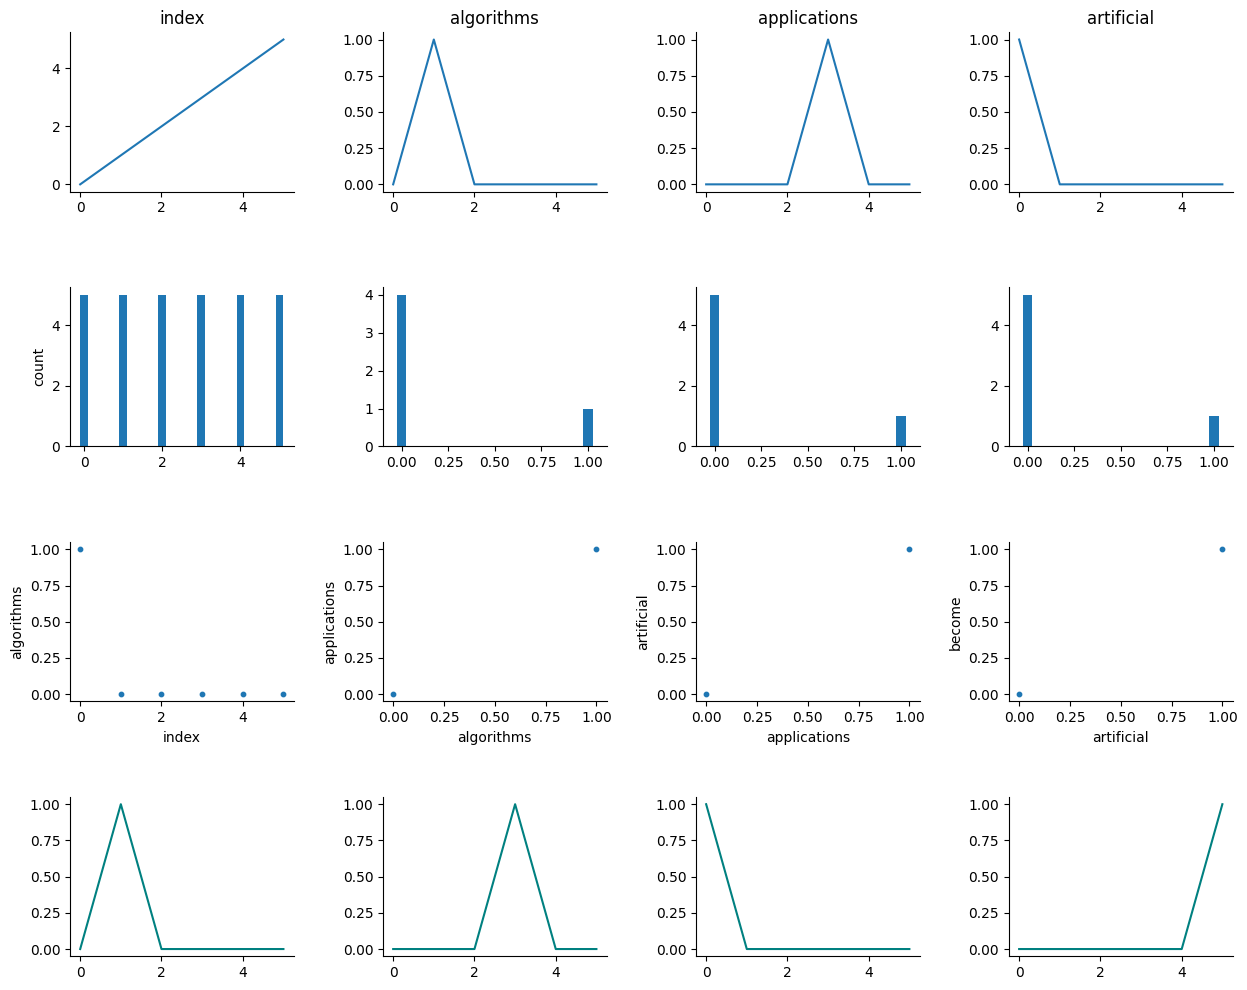

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Sample Data Setup
index = np.arange(6)
# Defining the "activations" or values for each word/token
algorithms = [0, 1, 0, 0, 0, 0]
applications = [0, 0, 0, 1, 0, 0]
artificial = [1, 0, 0, 0, 0, 0]
become = [0, 0, 0, 0, 0, 1]

fig, axes = plt.subplots(4, 4, figsize=(15, 12))
plt.subplots_adjust(hspace=0.6, wspace=0.4)

# --- ROW 1: VALUES (Continuous/Line) ---
# Represents the intensity or value of a token over an index
axes[0, 0].plot([0, 5], [0, 5]); axes[0, 0].set_title('index')
axes[0, 1].plot([0, 1, 2, 5], [0, 1, 0, 0]); axes[0, 1].set_title('algorithms')
axes[0, 2].plot([0, 2, 3, 4, 5], [0, 0, 1, 0, 0]); axes[0, 2].set_title('applications')
axes[0, 3].plot([0, 1, 5], [1, 0, 0]); axes[0, 3].set_title('artificial')

# --- ROW 2: DISTRIBUTIONS (Discrete/Bar) ---
# Shows frequency or probability at specific points
axes[1, 0].bar(index, [5]*6, width=0.2); axes[1, 0].set_ylabel('count')
axes[1, 1].bar([0, 1], [4, 1], width=0.05); axes[1, 1].set_xlim(-0.1, 1.1)
axes[1, 2].bar([0, 1], [5, 1], width=0.05); axes[1, 2].set_xlim(-0.1, 1.1)
axes[1, 3].bar([0, 1], [5, 1], width=0.05); axes[1, 3].set_xlim(-0.1, 1.1)

# --- ROW 3: 2-D DISTRIBUTIONS (Scatter) ---
# Relationships between word occurrences
axes[2, 0].scatter(index, [1, 0, 0, 0, 0, 0], s=10)
axes[2, 0].set_xlabel('index'); axes[2, 0].set_ylabel('algorithms')

axes[2, 1].scatter([0, 1], [0, 1], s=10)
axes[2, 1].set_xlabel('algorithms'); axes[2, 1].set_ylabel('applications')

axes[2, 2].scatter([0, 1], [0, 1], s=10)
axes[2, 2].set_xlabel('applications'); axes[2, 2].set_ylabel('artificial')

axes[2, 3].scatter([0, 1], [0, 1], s=10)
axes[2, 3].set_xlabel('artificial'); axes[2, 3].set_ylabel('become')

# --- ROW 4: TIME SERIES (Line/Sequence) ---
# Often used in NLP to show word activation across a sentence sequence
axes[3, 0].plot(index, algorithms, color='teal')
axes[3, 1].plot(index, applications, color='teal')
axes[3, 2].plot(index, artificial, color='teal')
axes[3, 3].plot(index, become, color='teal')

# Cleanup: Apply labels and common limits
for ax in axes.flat:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

plt.show()

In [13]:
bv = CountVectorizer(ngram_range=(2,2))
bv_matrix = bv.fit_transform(norm_data)
bv_matrix = bv_matrix.toarray()
vocab = bv.get_feature_names_out()
pd.DataFrame(bv_matrix, columns=vocab)

,10 math,90 persistence,amazing learning,brown fox,coding 2026,com help,data science,email us,fox jumps,help coding,involves 10,jumps lazy,lazy dog,learning speed_of_light,math 90,nlp amazing,quick brown,science involves,supportexample com,us supportexample
0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
2,1,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,1,1


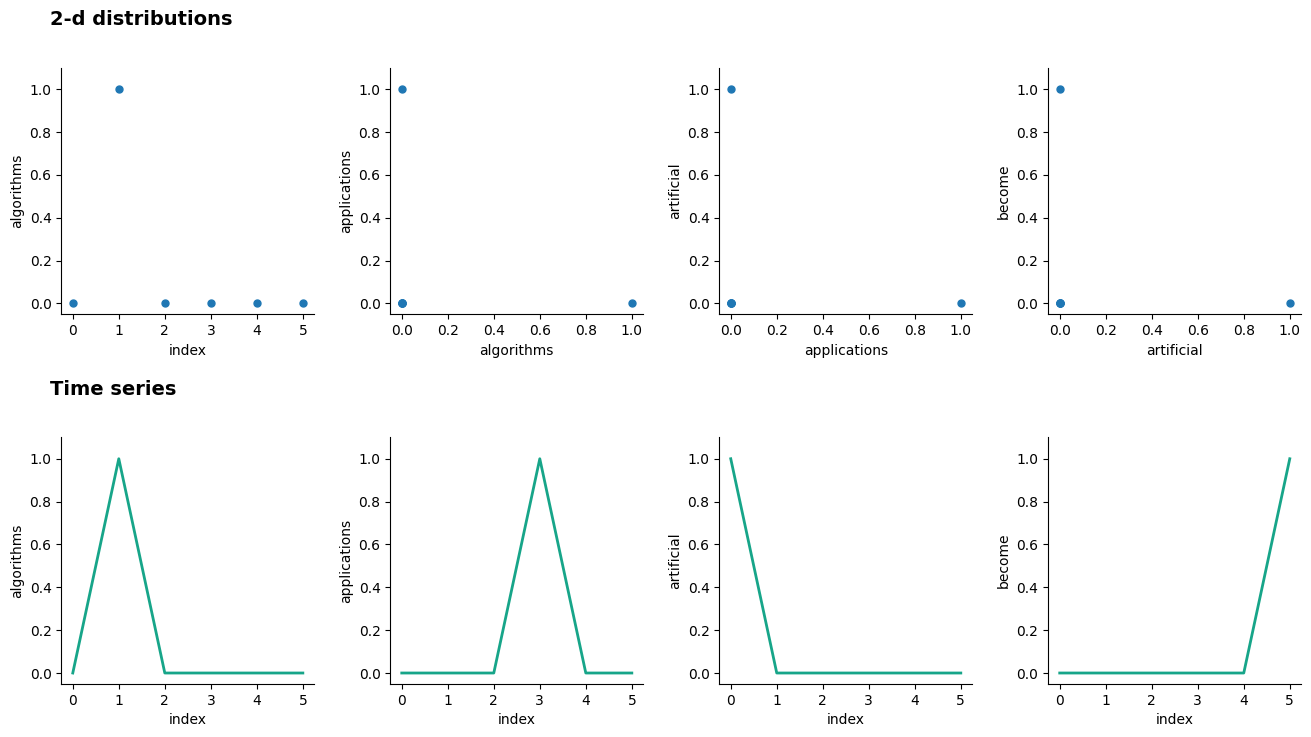

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# 1. Data Setup: Defining token activations across an index (sequence of 6 steps)
index = np.array([0, 1, 2, 3, 4, 5])
artificial   = np.array([1, 0, 0, 0, 0, 0])  # Peaks at index 0
algorithms   = np.array([0, 1, 0, 0, 0, 0])  # Peaks at index 1
applications = np.array([0, 0, 0, 1, 0, 0])  # Peaks at index 3
become       = np.array([0, 0, 0, 0, 0, 1])  # Peaks at index 5

fig, axes = plt.subplots(2, 4, figsize=(16, 8))
plt.subplots_adjust(hspace=0.5, wspace=0.3)

# --- ROW 1: 2-D DISTRIBUTIONS (Scatter) ---
# These show relationships/co-occurrence between variables
axes[0, 0].scatter(index, algorithms, s=25); axes[0, 0].set_ylabel('algorithms'); axes[0, 0].set_xlabel('index')
axes[0, 1].scatter(algorithms, applications, s=25); axes[0, 1].set_ylabel('applications'); axes[0, 1].set_xlabel('algorithms')
axes[0, 2].scatter(applications, artificial, s=25); axes[0, 2].set_ylabel('artificial'); axes[0, 2].set_xlabel('applications')
axes[0, 3].scatter(artificial, become, s=25); axes[0, 3].set_ylabel('become'); axes[0, 3].set_xlabel('artificial')

# --- ROW 2: TIME SERIES (Line) ---
# These show the "pulse" of a word over the sequence index
axes[1, 0].plot(index, algorithms, color='#17a589', linewidth=2); axes[1, 0].set_ylabel('algorithms'); axes[1, 0].set_xlabel('index')
axes[1, 1].plot(index, applications, color='#17a589', linewidth=2); axes[1, 1].set_ylabel('applications'); axes[1, 1].set_xlabel('index')
axes[1, 2].plot(index, artificial, color='#17a589', linewidth=2); axes[1, 2].set_ylabel('artificial'); axes[1, 2].set_xlabel('index')
axes[1, 3].plot(index, become, color='#17a589', linewidth=2); axes[1, 3].set_ylabel('become'); axes[1, 3].set_xlabel('index')

# --- Formatting ---
for i, ax in enumerate(axes.flat):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_ylim(-0.05, 1.1)
    # Add title for the first plot of each row
    if i == 0: ax.text(-0.5, 1.3, "2-d distributions", fontsize=14, fontweight='bold')
    if i == 4: ax.text(-0.5, 1.3, "Time series", fontsize=14, fontweight='bold')

plt.show()